## Topic Modeling Activity


#### Task: Import pandas and read in the quora_questions.csv file.store in dataframe named quora.

In [1]:
import pandas as pd
import numpy as np

In [10]:
quora = pd.read_csv('quora_questions.csv')
questionCol = pd

In [21]:
quora.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


# Preprocessing

#### Task: Use Count Vectorizer to create a vectorized document term matrix. You may want to explore the max_df and min_df parameters.

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

    max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    max_df = 25 means "ignore terms that appear in more than 25 documents".

The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word", 
                             lowercase=True, 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None,
                             max_features = 5000)

In [20]:
word_count_vector = vectorizer.fit_transform(quora)
print(word_count_vector.todense())

[[1]]


#### TASK: Use LDA to model 20 topics. (Use random_state=42).

In [25]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
LDA

#### show top words per topic

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

#### Add topic number to original questions

In [ ]:
topic_results = LDA.transform(dtm)

In [ ]:
quora['Topic'] = topic_results.argmax(axis=1)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

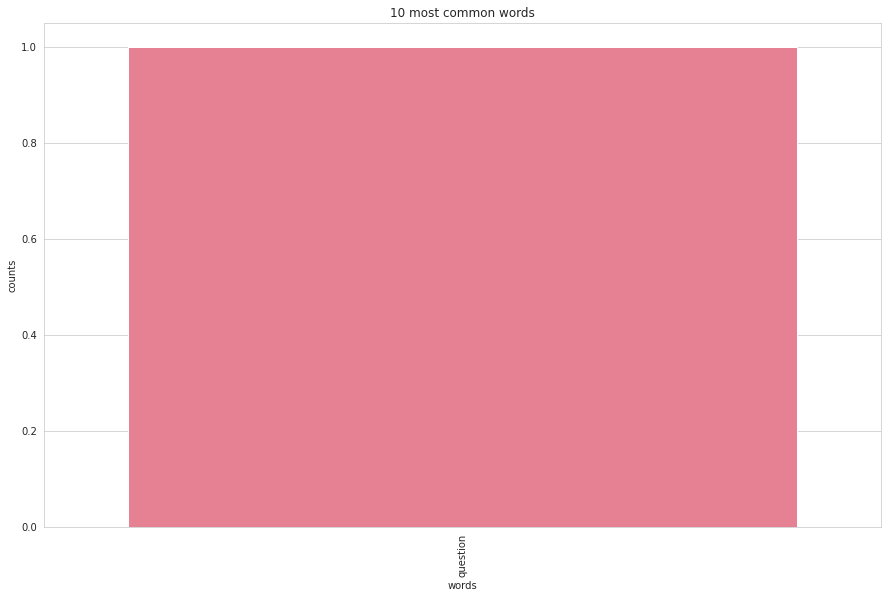

In [18]:
# Visualise the 10 most common words
plot_10_most_common_words(word_count_vector, vectorizer)